In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer


import warnings 
warnings.filterwarnings("ignore")

In [2]:
email = pd.read_csv('spam.csv', encoding='latin-1')
email.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
# Deleting irrelevant columns
# Renaming v1 and v2

email.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

email.rename(columns={'v1':'label','v2':'message'},inplace=True)

In [4]:
email.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
email.tail()

,label,message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [6]:
email.sample(3)

,label,message
4883,ham,For many things its an antibiotic and it can b...
1184,ham,"Yo, you around? Just got my car back"
4686,ham,Eatin my lunch...


In [7]:
email.shape

(5572, 2)

In [8]:
email.columns

Index(['label', 'message'], dtype='object')

In [9]:
type(email)

pandas.core.frame.DataFrame

In [10]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
email.isnull().sum()

label      0
message    0
dtype: int64

In [12]:
print('ham and spam counts','\n',email.label.value_counts())

ham and spam counts 
 ham     4825
spam     747
Name: label, dtype: int64


In [13]:
# Ratio

print('spam ratio = ', round(len(email[email['label']=='spam']) / len(email.label),2)*100,'%')
print('ham ratio = ', round(len(email[email['label']=='ham']) / len(email.label),2)*100,'%')

spam ratio =  13.0 %
ham ratio =  87.0 %


In [14]:
# New column for Length of message

email['length'] = email.message.str.len()
email.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [15]:
# New column for Length of message

email['length'] = email.message.str.len()
email.head(5)

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
# Label coding 0 and 1

email['label'].replace({'ham':0,'spam':1}, inplace=True)

In [17]:
# Convert all messages to lower case

email['message'] = email['message'].str.lower()

In [18]:
email.head()

,label,message,length
0,0,"go until jurong point, crazy.. available only ...",111
1,0,ok lar... joking wif u oni...,29
2,1,free entry in 2 a wkly comp to win fa cup fina...,155
3,0,u dun say so early hor... u c already then say...,49
4,0,"nah i don't think he goes to usf, he lives aro...",61


In [19]:
# Replace email address with 'email'
email['message'] = email['message'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')


# Replace URLs with 'webaddress'
email['message'] = email['message'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')


# Replace money symbols with 'moneysymb' (£ can be typed with ALT key + 156)
email['message'] = email['message'].str.replace(r'£|\$', 'dollars')


# Replace 10 digit phone numbers (formats include parenthesis, spaces, no spaces, dashes) with 'phonenumber'
email['message'] = email['message'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phonenumber')


# Replace numbers with 'numbr'
email['message'] = email['message'].str.replace(r'\d+(\.\d+)?', 'numbr')

In [20]:
# Remove punctuation
email['message'] = email['message'].str.replace(r'[^\w\d\s]', ' ')


# Replace whitespace between terms with a single space
email['message'] = email['message'].str.replace(r'\s+', ' ')
                                            
                                            
# Remove Leading and trailing whitespace
email['message'] = email['message'].str.replace(r'^\s+|\s+?$', ' ')       

In [21]:
email.head()

,label,message,length
0,0,go until jurong point crazy available only in ...,111
1,0,ok lar joking wif u oni,29
2,1,free entry in numbr a wkly comp to win fa cup ...,155
3,0,u dun say so early hor u c already then say,49
4,0,nah i don t think he goes to usf he lives arou...,61


In [22]:
# Remove stopwords
import string 
import nltk
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english') + ['u','ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])

email['message'] = email['message'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

In [23]:
# Lemmatization

lem = WordNetLemmatizer()
email['message'] = email['message'].apply(lambda x: ' '.join(
 lem.lemmatize(word) for word in x.split()))

In [24]:
# New column (clean_length) after punctuations , stopwords removal

email['clean_length'] = email.message.str.len()
email.head()

,label,message,length,clean_length
0,0,go jurong point crazy available bugis n great ...,111,82
1,0,ok lar joking wif oni,29,21
2,1,free entry numbr wkly comp win fa cup final tk...,155,139
3,0,dun say early hor c already say,49,31
4,0,nah think go usf life around though,61,35


In [25]:
# Total length removal

print('Original Length', email.length.sum())

print('Clean Length', email.clean_length.sum())

Original Length 446422
Clean Length 297384


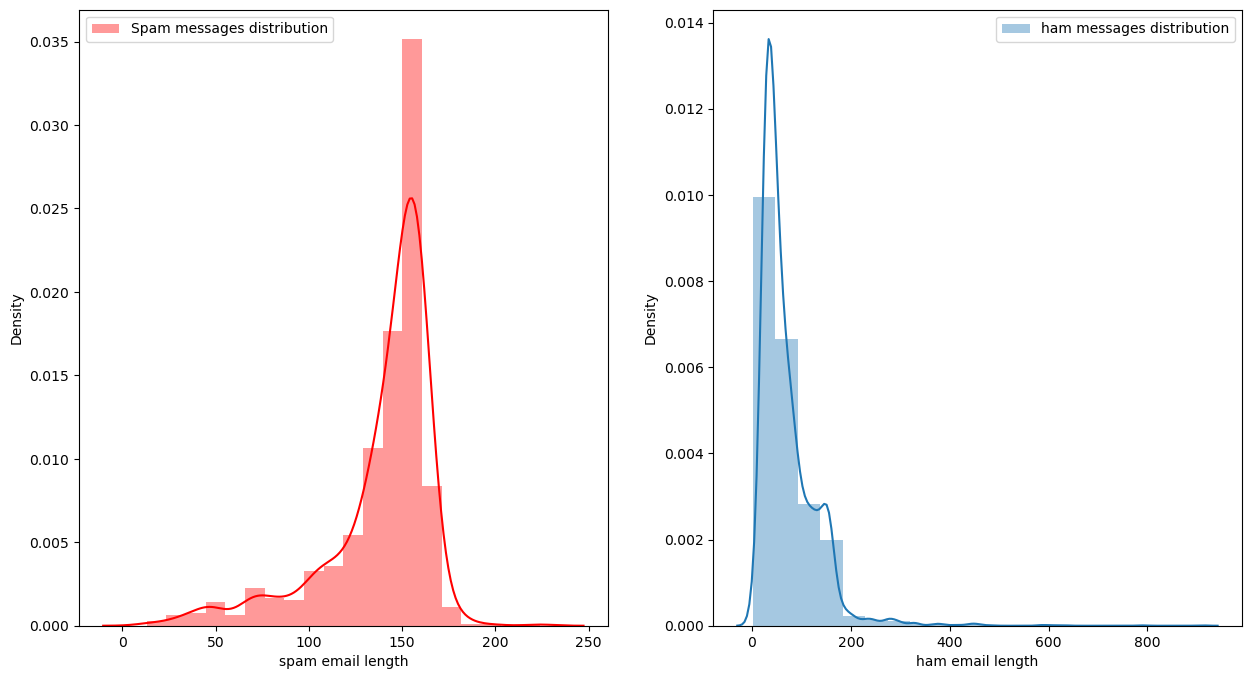

In [26]:
# Message distribution BEFORE cleaning

f,ax = plt.subplots(1, 2, figsize = (15,8))

sns.distplot(email[email['label']==1]['length'], bins=20, ax=ax[0], label='Spam messages distribution', color='r')
ax[0].set_xlabel('spam email length')
ax[0].legend()


sns.distplot(email[email['label']==0]['length'], bins=20, ax=ax[1], label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

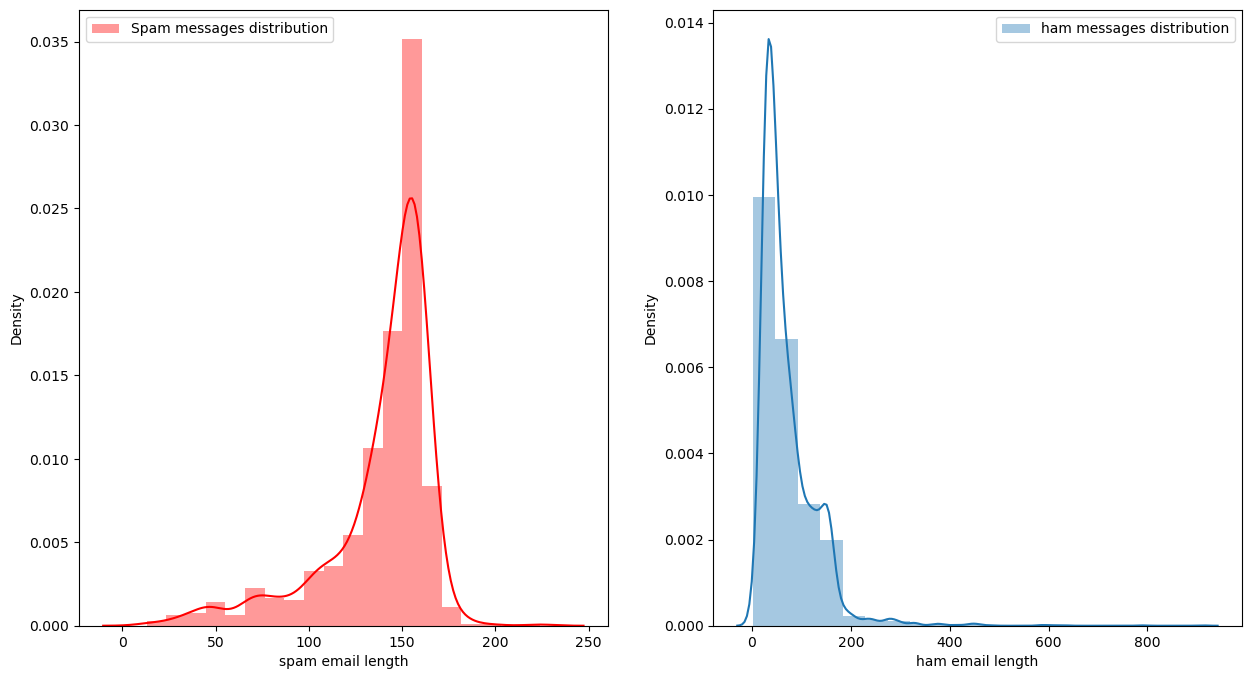

In [27]:
# Message distribution AFTER cleaning

f,ax = plt.subplots(1, 2, figsize = (15,8))

sns.distplot(email[email['label']==1]['length'], bins=20, ax=ax[0], label='Spam messages distribution', color='r')
ax[0].set_xlabel('spam email length')
ax[0].legend()


sns.distplot(email[email['label']==0]['length'], bins=20, ax=ax[1], label='ham messages distribution')
ax[1].set_xlabel('ham email length')
ax[1].legend()

plt.show()

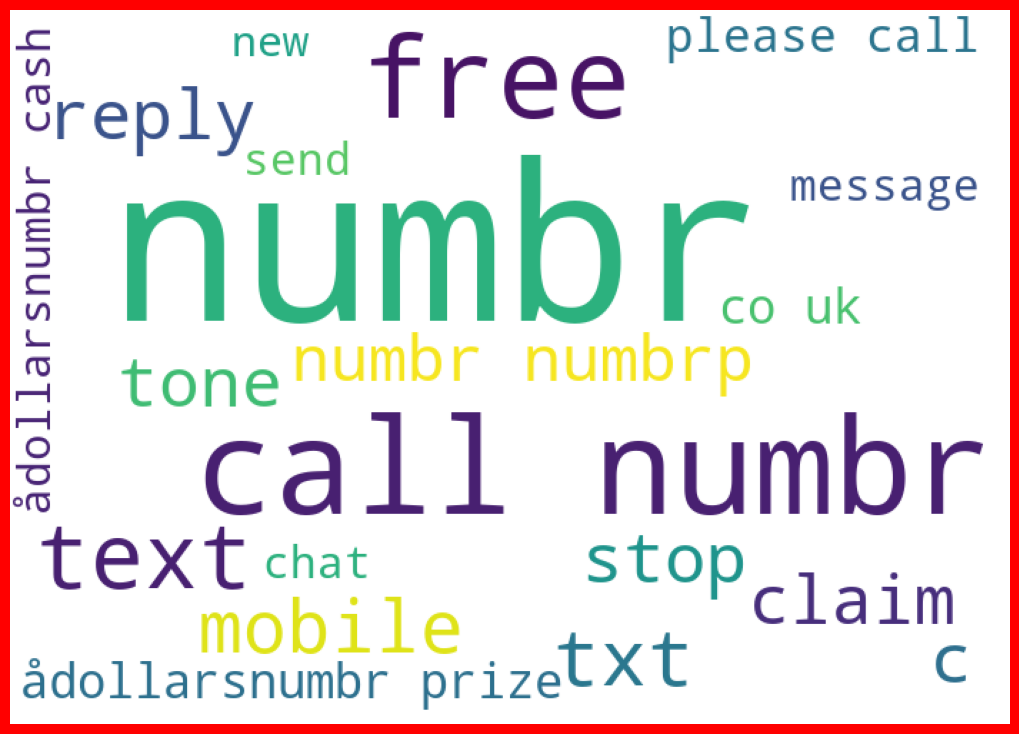

In [28]:
# Getting sense of loud words in spam

from wordcloud import WordCloud

spams = email['message'][email['label']==1]

spam_cloud = WordCloud(width=700, height=500, background_color='white', max_words=20).generate(' '.join(spams))

plt.figure(figsize=(10,8), facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

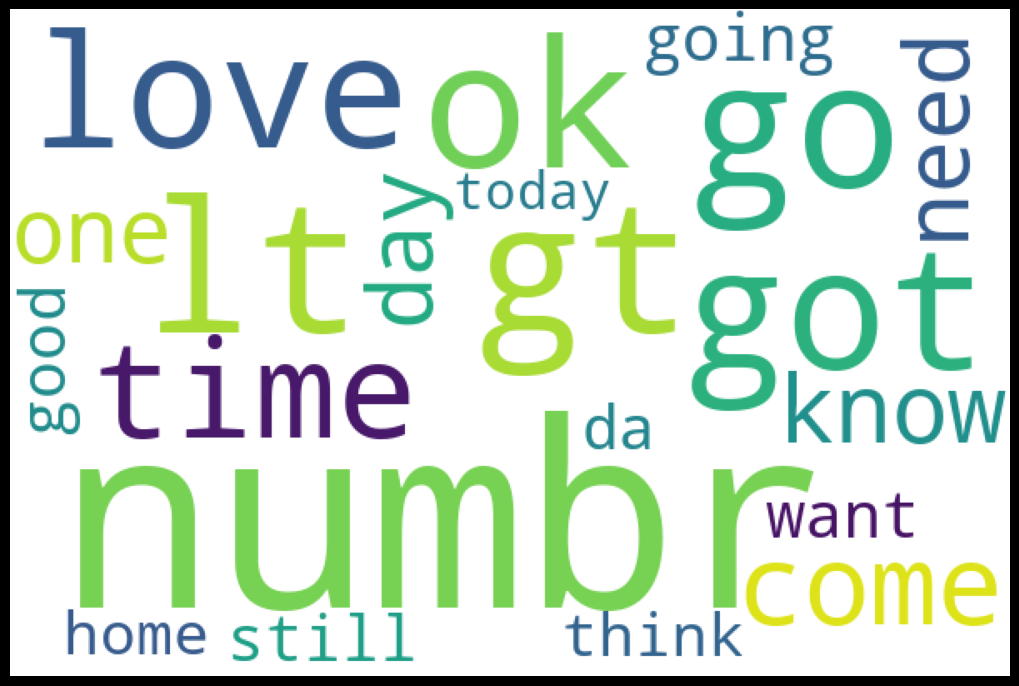

In [29]:
# Getting sense of loud words in ham

from wordcloud import WordCloud

hams = email['message'][email['label']==0]

spam_cloud = WordCloud(width=600, height=400, background_color='white', max_words=20).generate(' '.join(hams))

plt.figure(figsize=(10,8), facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()
features = tf.fit_transform(email["message"])
x = features
y = email["label"]

# Finding best random state

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [32]:
from sklearn.linear_model import LogisticRegression

maxAccu = 0
maxRS = 0
for i in range(1,200):
    xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state =i)
    LR = LogisticRegression()
    LR.fit(xtrain, ytrain)
    pred = LR.predict(xtest)
    acc=accuracy_score(ytest, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ", maxAccu, " on Random_state ", maxRS)

Best accuracy is  0.9798994974874372  on Random_state  148


In [33]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=.25, random_state=maxRS)

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss

# Model Building

# Logistic Regression

In [35]:
LR = LogisticRegression()
LR.fit(xtrain, ytrain)

ypred= LR.predict(xtest)

In [36]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       0.98      0.84      0.90       157

    accuracy                           0.98      1393
   macro avg       0.98      0.92      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [37]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(LR,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9798994974874372 
 cross validation score : 0.9675164077234503 
 logloss: 0.6942484837399793


In [38]:
confusion_matrix(ytest,ypred)

array([[1233,    3],
       [  25,  132]], dtype=int64)

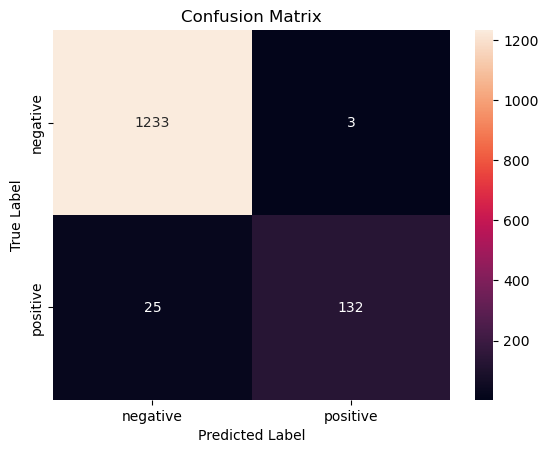

In [39]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [40]:
accuracy = []
cross_val = []
diff = []
logloss=[]

In [41]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Decision Tree Classifier

In [42]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

ypred= dt.predict(xtest)

In [43]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1236
           1       0.89      0.90      0.90       157

    accuracy                           0.98      1393
   macro avg       0.94      0.95      0.94      1393
weighted avg       0.98      0.98      0.98      1393



In [44]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(dt,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9770279971284996 
 cross validation score : 0.9741566883246491 
 logloss: 0.7934346287103062


In [45]:
confusion_matrix(ytest,ypred)

array([[1219,   17],
       [  15,  142]], dtype=int64)

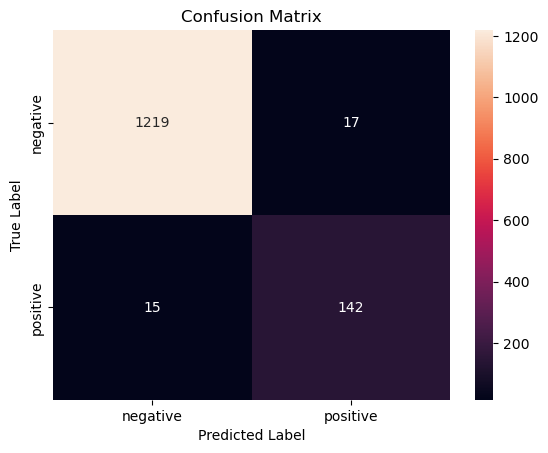

In [46]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [47]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Linear Support Vector Machine Classifier

In [48]:
from sklearn.svm import LinearSVC

svc = LinearSVC()
svc.fit(xtrain, ytrain)

ypred= svc.predict(xtest)

In [49]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1236
           1       0.98      0.92      0.95       157

    accuracy                           0.99      1393
   macro avg       0.98      0.96      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [50]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(svc,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9885139985642498 
 cross validation score : 0.9822325903847369 
 logloss: 0.3967141572942304


In [51]:
confusion_matrix(ytest,ypred)

array([[1233,    3],
       [  13,  144]], dtype=int64)

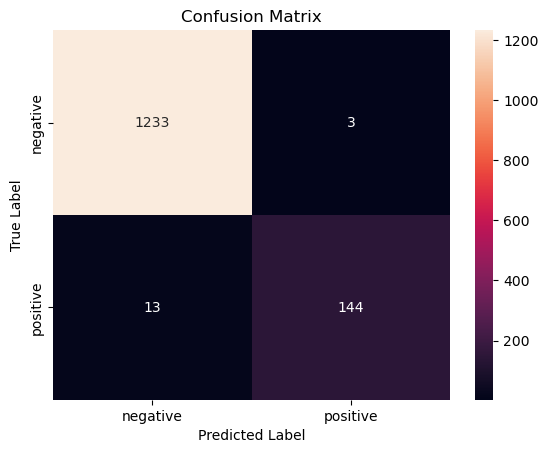

In [52]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [53]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Ada Boost Classifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc.fit(xtrain, ytrain)

ypred = abc.predict(xtest)

In [55]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1236
           1       0.97      0.90      0.94       157

    accuracy                           0.99      1393
   macro avg       0.98      0.95      0.96      1393
weighted avg       0.99      0.99      0.99      1393



In [56]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(abc,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9863603732950467 
 cross validation score : 0.9764894282806607 
 logloss: 0.47109831291674453


In [57]:
confusion_matrix(ytest,ypred)

array([[1232,    4],
       [  15,  142]], dtype=int64)

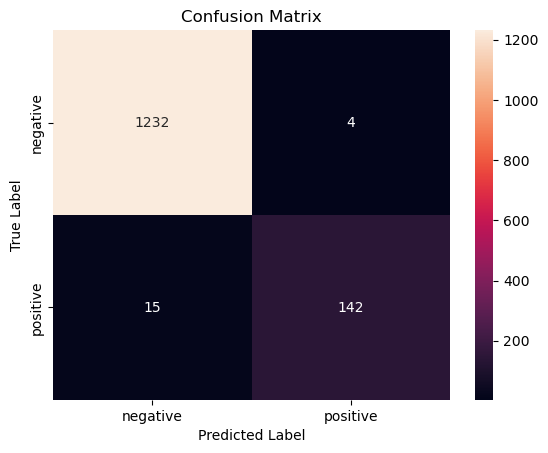

In [58]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [59]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# KNeighbors Classifier

In [60]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

ypred = knn.predict(xtest)

In [61]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1236
           1       1.00      0.38      0.55       157

    accuracy                           0.93      1393
   macro avg       0.96      0.69      0.76      1393
weighted avg       0.94      0.93      0.92      1393



In [62]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(knn,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9303661162957645 
 cross validation score : 0.9090088434668306 
 logloss: 2.405069138769804


In [63]:
confusion_matrix(ytest,ypred)

array([[1236,    0],
       [  97,   60]], dtype=int64)

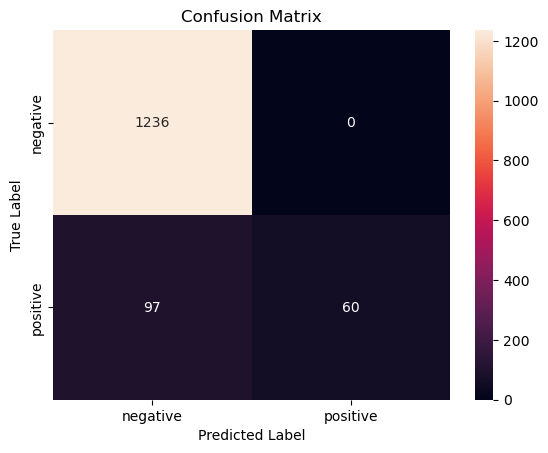

In [64]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [65]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

# Multinomial Naive Bayes Classifier

In [66]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(xtrain,ytrain)

ypred = mnb.predict(xtest)

In [67]:
print("\nClassification report :\n",classification_report(ytest, ypred))


Classification report :
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.83      0.91       157

    accuracy                           0.98      1393
   macro avg       0.99      0.91      0.95      1393
weighted avg       0.98      0.98      0.98      1393



In [68]:
a = accuracy_score(ytest, ypred)
c = cross_val_score(mnb,x,y,cv=3).mean()
loss = log_loss(ytest,ypred)

print("accuracy_score : ",a,"\n","cross validation score :",c,"\n","logloss:",loss)

accuracy_score :  0.9806173725771715 
 cross validation score : 0.967336616906829 
 logloss: 0.6694522345029359


In [69]:
confusion_matrix(ytest,ypred)

array([[1236,    0],
       [  27,  130]], dtype=int64)

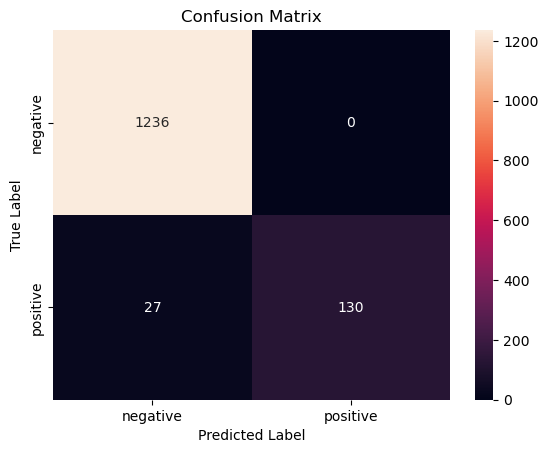

In [70]:
conf_mat = confusion_matrix(ytest, ypred)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [71]:
accuracy.append(a)
cross_val.append(c)
diff.append(a-c)
logloss.append(loss)

In [72]:
model = ["LogisticRegression","DecisionTreeClassifier", "LinearSupportVectorMachineClassifier", "AdaBoostClassifier","KNeighborsClassifier","MultinomialNaiveBayesClassifier"]

In [73]:
classifier = pd.DataFrame({"MODEL":model,"Accuracy score":accuracy,"Cross_validation_Score":cross_val,"Difference":diff,"Logloss":logloss})

classifier

,MODEL,Accuracy score,Cross_validation_Score,Difference,Logloss
0,LogisticRegression,0.979899,0.967516,0.012383,0.694248
1,DecisionTreeClassifier,0.977028,0.974157,0.002871,0.793435
2,LinearSupportVectorMachineClassifier,0.988514,0.982233,0.006281,0.396714
3,AdaBoostClassifier,0.986360,0.976489,0.009871,0.471098
4,KNeighborsClassifier,0.930366,0.909009,0.021357,2.405069
5,MultinomialNaiveBayesClassifier,0.980617,0.967337,0.013281,0.669452


# Hyper Parameter Tuning

In [75]:
from sklearn.model_selection import RandomizedSearchCV

param = {'loss': ['hinge', 'squared_hinge'],
         'C': [0.1, 1, 10, 100, 1000], 
         'multi_class': ['ovr', 'crammer_singer'],
         'class_weight': ['dict', 'balanced']}

In [76]:
rand_search = RandomizedSearchCV(svc, param_distributions=param, cv=2)

In [77]:
rand_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=2, estimator=LinearSVC(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'class_weight': ['dict', 'balanced'],
                                        'loss': ['hinge', 'squared_hinge'],
                                        'multi_class': ['ovr',
                                                        'crammer_singer']})

In [78]:
rand_search.best_params_

{'multi_class': 'crammer_singer',
 'loss': 'hinge',
 'class_weight': 'balanced',
 'C': 10}

In [79]:
svc = LinearSVC(multi_class='crammer_singer', loss='hinge', class_weight= 'balanced', C= 10)
svc.fit(xtrain, ytrain)

ypred1= svc.predict(xtest)

In [80]:
print(" Accuracy score :",accuracy_score(ytest,ypred1),"\n","="*80,"\n Cross_validation_Score :",
      cross_val_score(svc,x,y,cv=3).mean(),"\n","="*80,"\n Classification report :\n",classification_report(ytest,ypred1),
     "="*80,"\n Confusion matrix :\n",confusion_matrix(ytest,ypred1))

 Accuracy score : 0.9877961234745154 
 Cross_validation_Score : 0.9816942806425479 
 Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      1236
           1       0.98      0.91      0.94       157

    accuracy                           0.99      1393
   macro avg       0.98      0.95      0.97      1393
weighted avg       0.99      0.99      0.99      1393
 Confusion matrix :
 [[1233    3]
 [  14  143]]


In [81]:
log_loss(ytest,ypred1)

0.42150868449804274

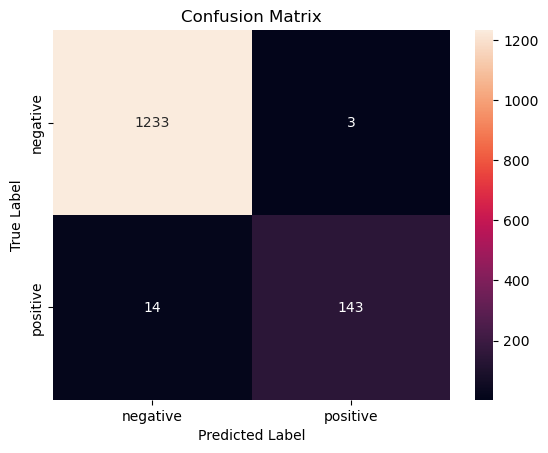

In [82]:
conf_mat = confusion_matrix(ytest, ypred1)
class_label = ["negative", "positive"]
email = pd.DataFrame(conf_mat, index = class_label, columns = class_label)
sns.heatmap(email, annot = True,fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [83]:
from sklearn.metrics import roc_curve,roc_auc_score,plot_roc_curve

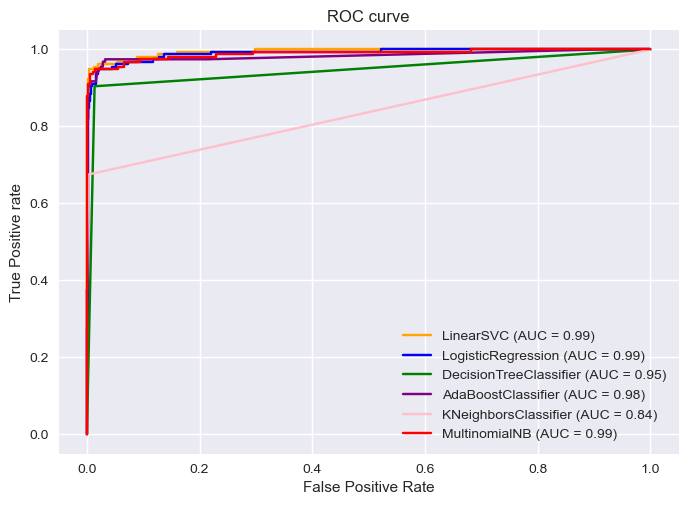

In [84]:
plt.style.use('seaborn')

disp = plot_roc_curve(svc, xtest, ytest, color='orange')
plot_roc_curve(LR, xtest, ytest, color='blue', ax=disp.ax_)
plot_roc_curve(dt, xtest, ytest, color='green', ax=disp.ax_)
plot_roc_curve(abc, xtest, ytest, color='purple', ax=disp.ax_)
plot_roc_curve(knn, xtest, ytest, color='pink', ax=disp.ax_)
plot_roc_curve(mnb, xtest, ytest, color='red', ax=disp.ax_)


plt.title('ROC curve')

plt.xlabel('False Positive Rate')

plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)

# Saving the Model

In [85]:
import joblib

joblib.dump(svc,'Email Spam Classifier.pkl')

['Email Spam Classifier.pkl']

# Loading the Model

In [86]:
loadmodel = joblib.load('Email Spam Classifier.pkl')
loadmodel.predict(xtest)

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
conclusion = pd.DataFrame([loadmodel.predict(xtest)[:], ytest[:]], index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392
Predicted,0,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Original,0,1,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
